# 1 - Data Extraction

## Victor Jose Novaes Pires

### 2019-02-25

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Mega-Sena

Mega-Sena is the largest lottery in Brazil and is held by the Caixa Econômica Federal bank.

The Mega-Sena has drawings twice a week from a spinning acrylic cage with balls from 01 to 60. Until 2009, they consisted of picking balls from 2 spinning spherical cages. The balls were picked in pairs, in order to form a 2 digit decimal number from 01 to 60. The first cage had balls ranging from 0 to 5 for the first digit, and the other had balls ranging from 0 to 9 to for the second digit. In the event of a 00, it was replaced by a 60. When 6 unique 2 digit numbers were drawn, the drawing was concluded.

Contestants may bet in the range from 6 to 15 numbers, out of 60, and scoring 4, 5 or 6 points will grant prizes. Bet prices escalate depending on how many possible groups of 6 numbers exist within the numbers chosen and they go from 3.50 reais for 6 numbers (only 1 possible game) to 17,517.50 reais for 15 numbers (5005 unique six numbers games).


### Probability

The odds of scoring all six numbers with the most common six numbers game is about one in fifty million the precise number of unique six numbers games can easily be calculated with combinations.

$$
{{60}\choose{6}} = \frac{60!}{6! \cdot (60 - 6)!} = \frac{60!}{6! \cdot 54!} = 
\frac{60 \cdot 59 \cdot 58 \cdot 57 \cdot 56 \cdot 55 \cdot 54!}
        {6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1 \cdot 54!} = 50,063,860
$$

Sources:
[Official Website](http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/) ; 
[Wikipedia BR](https://pt.wikipedia.org/wiki/Mega-Sena) ; 
[Wikipedia EN](https://en.wikipedia.org/wiki/Mega-Sena)

## Data

The [official website](http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/) has a [link](http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip) to download the latest results and this repository also has the [2019-02-25 version of the results](D_megase.zip).

In [1]:
import zipfile

with zipfile.ZipFile(f"D_megase.zip", 'r') as myzip:
    with myzip.open('D_MEGA.HTM') as myfile:
        data_page = myfile.read()

## Data extraction

In [2]:
import pandas as pd

df = pd.read_html(data_page, index_col=0)[0]

df.head()

,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
Concurso,,,,,,,,,,,,,,,,,,,,
1,11/03/1996,41,5,4,52,30,33,000,0,&nbsp,&nbsp,000,17,39.15892,2016,33021.0,SIM,1.714.65023,000,000
2,18/03/1996,9,39,37,49,43,41,000,1,NaN,PR,2.307.16223,65,14.42402,4488,20891.0,NÃO,000,000,000
3,25/03/1996,36,30,10,11,29,47,000,2,NaN,RN,391.19251,62,10.51593,4261,15301.0,NÃO,000,000,000
3,25/03/1996,36,30,10,11,29,47,000,2,NaN,SP,391.19251,62,10.51593,4261,15301.0,NÃO,000,000,000
4,01/04/1996,6,59,42,27,1,5,000,0,&nbsp,&nbsp,000,39,15.32224,3311,18048.0,SIM,717.08075,000,000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395 entries, 1 to 2127
Data columns (total 20 columns):
Data Sorteio                2395 non-null object
1ª Dezena                   2395 non-null int64
2ª Dezena                   2395 non-null int64
3ª Dezena                   2395 non-null int64
4ª Dezena                   2395 non-null int64
5ª Dezena                   2395 non-null int64
6ª Dezena                   2395 non-null int64
Arrecadacao_Total           2395 non-null object
Ganhadores_Sena             2395 non-null int64
Cidade                      2109 non-null object
UF                          2395 non-null object
Rateio_Sena                 2395 non-null object
Ganhadores_Quina            2395 non-null int64
Rateio_Quina                2395 non-null float64
Ganhadores_Quadra           2395 non-null int64
Rateio_Quadra               2395 non-null float64
Acumulado                   2395 non-null object
Valor_Acumulado             2395 non-null object
Estimativa_Prêmio 

#### Pandas has certainly come a long way and does a good job converting the page exported from a spreadsheet into a dataframe.

## Data cleaning

In [4]:
df = df.iloc[:, :7] # Only dates and numbers drawn

df.index.rename('Drawing', inplace=True)

df.rename(columns={'Data Sorteio': 'Date'}, inplace=True)

df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")

df.rename(columns={'1ª Dezena': '1st ball',
                   '2ª Dezena': '2nd ball',
                   '3ª Dezena': '3rd ball',
                   '4ª Dezena': '4th ball',
                   '5ª Dezena': '5th ball',
                   '6ª Dezena': '6th ball'},
          inplace=True)

df.head()

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
1,1996-03-11,41,5,4,52,30,33
2,1996-03-18,9,39,37,49,43,41
3,1996-03-25,36,30,10,11,29,47
3,1996-03-25,36,30,10,11,29,47
4,1996-04-01,6,59,42,27,1,5


In [5]:
df.tail()

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
2123,2019-02-09,47,59,14,56,50,15
2124,2019-02-13,31,20,47,43,2,11
2125,2019-02-16,44,1,31,53,46,58
2126,2019-02-20,58,39,27,7,24,12
2127,2019-02-23,7,46,28,30,44,1


In [6]:
# How many times each number was drawn on each ball
vc = df.iloc[:, 1:7].apply(pd.Series.value_counts, dropna=False, ascending=True)

# All seems well at first glance, not even a single missing value
vc

,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
1,37,39,44,50,30,45
2,44,44,39,32,39,46
3,31,45,38,24,62,47
4,56,34,45,38,40,42
5,48,61,39,48,38,99
6,56,43,36,35,40,42
7,41,33,33,43,36,33
8,32,55,44,35,37,39
9,34,36,31,34,39,33
10,41,50,94,53,54,45


In [7]:
# Statistics for the value_counts above, the max are way above the quantiles!

vc.describe()

,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,39.916667,39.916667,39.916667,39.916667,39.916667,39.916667
std,10.299402,10.637783,10.737692,8.782285,10.246606,10.186884
min,23.000000,23.000000,23.000000,24.000000,21.000000,27.000000
25%,33.750000,33.000000,33.000000,34.750000,35.000000,33.750000
50%,39.500000,38.000000,38.000000,39.000000,39.000000,39.000000
75%,44.000000,44.250000,44.250000,43.000000,42.000000,44.250000
max,95.000000,95.000000,94.000000,80.000000,95.000000,99.000000


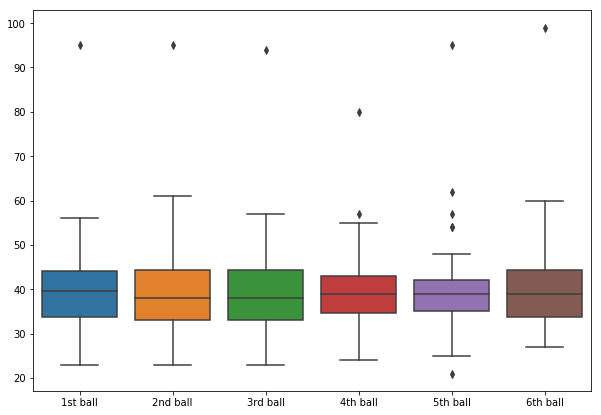

In [8]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 7])
sns.boxplot(data=vc)
plt.show()

In [9]:
# The dataframe has more rows than there were drawings!

print(f"Number of rows: {len(df)}\nNumber of drawings: {df.index[-1]}")

Number of rows: 2395
Number of drawings: 2127


In [10]:
# Some drawings have more than one row

df.index.value_counts(dropna=False).head(10)

2110    52
2000    17
529     15
1211     7
1890     6
1775     6
233      5
1350     5
1157     4
2028     4
Name: Drawing, dtype: int64

In [11]:
# How many times did a drawing had multiple rows?

mr_drawings = df.index.value_counts(dropna=False) > 1

sum(mr_drawings)

126

In [12]:
# Let's investigate one of those multiple rows drawings

df.loc[[2000]]

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
2000,2017-12-31,6,37,34,10,3,17
2000,2017-12-31,6,37,34,10,3,17
2000,2017-12-31,6,37,34,10,3,17
2000,2017-12-31,6,37,34,10,3,17
2000,2017-12-31,6,37,34,10,3,17
2000,2017-12-31,6,37,34,10,3,17
2000,2017-12-31,6,37,34,10,3,17
2000,2017-12-31,6,37,34,10,3,17
2000,2017-12-31,6,37,34,10,3,17


#### A drawing has multiple rows when there was more than one winner.

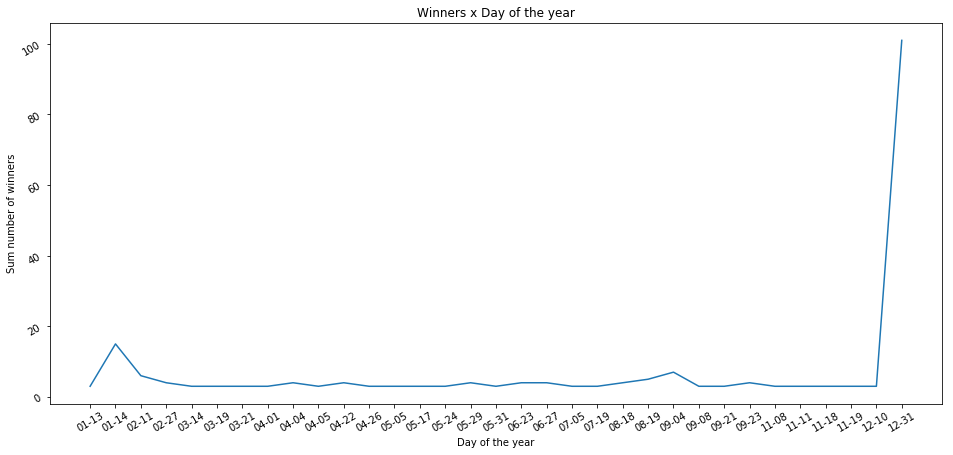

In [13]:
# What is the distribution of those drawings over time?

# Filter even more so the x ticks are legible
mr_drawings_2 = df.index.value_counts(dropna=False) > 2

# The dates, MM-DD, where there were three or more multiple rows
mr_dates = df.Date.loc[mr_drawings_2.sort_index()].dt.strftime('%m-%d')

plt.figure(figsize=[16, 7])
ax = sns.lineplot(data=mr_dates.value_counts())
ax.set_title('Winners x Day of the year')
ax.set_xlabel('Day of the year')
ax.set_ylabel('Sum number of winners')
ax.tick_params(labelrotation=30)
plt.show()

#### On the last day of the year the drawing is special and there's always a winner(s), if no one scores the six points the prize goes to those who scored five points.

In [14]:
# Finally let's clear the duplicate rows
df.drop_duplicates(inplace=True)

df.head()

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
1,1996-03-11,41,5,4,52,30,33
2,1996-03-18,9,39,37,49,43,41
3,1996-03-25,36,30,10,11,29,47
4,1996-04-01,6,59,42,27,1,5
5,1996-04-08,1,19,46,6,16,2


In [15]:
len(df) == df.index[-1]

True

In [16]:
# Check again the value counts for each ball
vc = df.iloc[:, 1:7].apply(pd.Series.value_counts, dropna=False, ascending=True)
vc.describe()

,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,35.450000,35.450000,35.450000,35.450000,35.450000,35.450000
std,6.082554,6.225767,6.195748,5.422567,5.321606,5.140154
min,22.000000,23.000000,23.000000,24.000000,21.000000,27.000000
25%,31.750000,31.000000,31.000000,31.000000,32.000000,31.000000
50%,35.000000,35.500000,35.000000,35.000000,35.000000,35.000000
75%,39.250000,39.250000,39.000000,39.000000,39.000000,39.000000
max,51.000000,54.000000,51.000000,52.000000,45.000000,50.000000


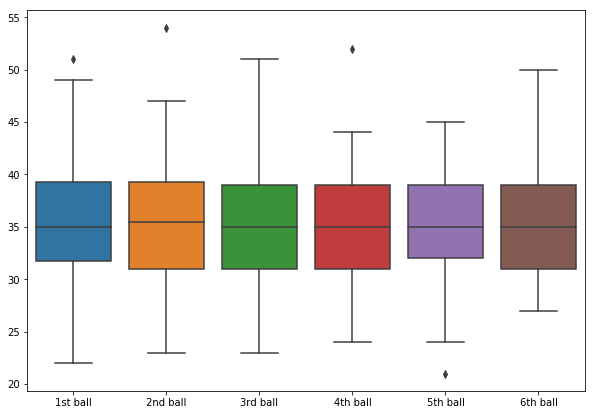

In [17]:
plt.figure(figsize=[10, 7])
sns.boxplot(data=vc)
plt.show()

In [18]:
# And for each number ever drawn
all_numbers = pd.concat([df[col] for col in df.iloc[:, 1:7].columns], axis=0)
all_numbers.head()

Drawing
1    41
2     9
3    36
4     6
5     1
dtype: int64

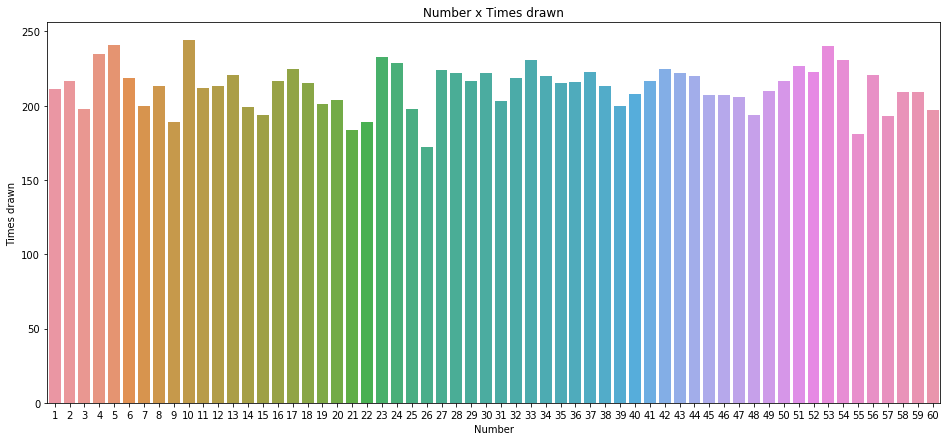

In [19]:
plt.figure(figsize=[16, 7])
ax = sns.barplot(data=all_numbers.value_counts().sort_index().to_frame().T)
ax.set_title('Number x Times drawn')
ax.set_xlabel('Number')
ax.set_ylabel('Times drawn')
plt.show()

## Data verification

#### Another way to extract the data that doesn’t rely on automated tools but on knowing how the data is structured is through regular expressions.

In [20]:
import re

# The numbers are always two digits, from 01 to 60
number_regex = re.compile(r'\>\d{2}\<')

# Dates are in the standard Brazilian format: DD/MM/YYY
date_regex = re.compile(r'\d{2}\/\d{2}\/\d{4}')

In [21]:
data_page = str(data_page).split(r'\r')

df_regex = []

drawing = 1
for i, line in enumerate(data_page):
    date = date_regex.search(line)
    if date is not None:
        drawing_data = [drawing, date.group(0)]
        j = 1 # Helper variable to read the next lines
        while len(drawing_data) < 8: # Drawing number, date and the six numbers
            number = number_regex.search(data_page[i + j])
            if number is not None:
                number = int(number.group(0)[1:3])
                drawing_data.append(number)
            j += 1
        df_regex.append(drawing_data)
        drawing += 1

In [22]:
df_regex[:5]

[[1, '11/03/1996', 41, 5, 4, 52, 30, 33],
 [2, '18/03/1996', 9, 39, 37, 49, 43, 41],
 [3, '25/03/1996', 36, 30, 10, 11, 29, 47],
 [4, '01/04/1996', 6, 59, 42, 27, 1, 5],
 [5, '08/04/1996', 1, 19, 46, 6, 16, 2]]

In [23]:
df_regex[-5:]

[[2123, '09/02/2019', 47, 59, 14, 56, 50, 15],
 [2124, '13/02/2019', 31, 20, 47, 43, 2, 11],
 [2125, '16/02/2019', 44, 1, 31, 53, 46, 58],
 [2126, '20/02/2019', 58, 39, 27, 7, 24, 12],
 [2127, '23/02/2019', 7, 46, 28, 30, 44, 1]]

In [24]:
df_regex = pd.DataFrame(data=df_regex,
                        columns=['Drawing', 'Date', '1st ball', '2nd ball',
                                 '3rd ball', '4th ball', '5th ball', '6th ball'])

df_regex.set_index('Drawing', inplace=True)

df_regex.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")

df_regex.head()

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
1,1996-03-11,41,5,4,52,30,33
2,1996-03-18,9,39,37,49,43,41
3,1996-03-25,36,30,10,11,29,47
4,1996-04-01,6,59,42,27,1,5
5,1996-04-08,1,19,46,6,16,2


In [25]:
df.equals(df_regex)

True

## Export clean dataframe

In [26]:
df.to_csv('megasena.csv')

### Import clean dataframe

In [27]:
df_csv = pd.read_csv('megasena.csv', index_col=0, parse_dates=[1])
df.equals(df_csv)

True